In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

train_dir = '/content/gdrive/My Drive/Captcha_set/Train'
test_dir = '/content/gdrive/My Drive/Captcha_set/Test'


Mounted at /content/gdrive


In [2]:
#Imports

import numpy as np 

%matplotlib inline 

import matplotlib.pyplot as plt #for graphs
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import string
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print a sample of the images in dataset
os.listdir(train_dir)
train_head = os.listdir(train_dir)[:3]
for file in train_head:
  print(file)


os.listdir(test_dir)
test_head = os.listdir(test_dir)[:3]
for file in test_head:
  print(file)




z2gf.png
.DS_Store
j7no.png
t8tu.png
s2m2.png
smi8.png


Sample of train images


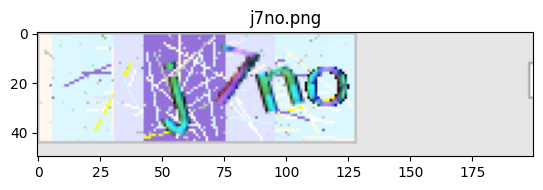

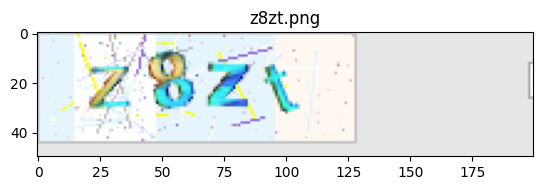

Sample of test images


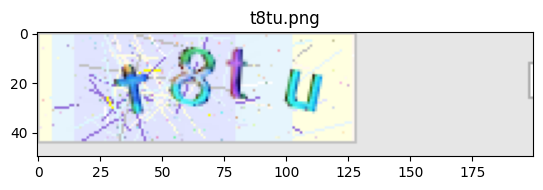

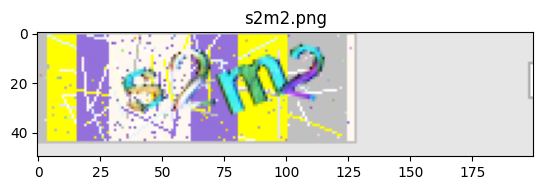

In [4]:
#Printing a sample of the dataset. Raw images

train_files = os.listdir(train_dir)
train_head = os.listdir(train_dir)[2:4]

print("Sample of train images")
for file in train_head:
    img_path = os.path.join(train_dir, file)
    img = cv2.imread(img_path)#, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(file)
    plt.show()

test_files = os.listdir(test_dir)
test_head = os.listdir(test_dir)[:2]

print("Sample of test images")
for file in test_head:
    img_path = os.path.join(test_dir, file)
    img = cv2.imread(img_path)#, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(file)
    plt.show()




In [5]:

#total images in our train set
n = len([os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith('.png')])
n

#total images in our test set
p = len([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.png')])

print("Train:",n)
print("Test:",p)

Train: 245
Test: 62


In [6]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1 colour channel


In [7]:
#36 Alphanumeric characters
character= string.ascii_lowercase + "0123456789" # All possible characters appearing in a captcha (case insensitive)
nchar = len(character) #total number of possible characters
nchar


36

In [8]:
train_dir
test_dir

'/content/gdrive/My Drive/Captcha_set/Test'

In [9]:
train_dir
test_dir
def preprocess():#added
    X = np.zeros((n, 50, 200, 1))
    y = np.zeros((4, n, nchar))

    train_index = 0
    for i, pic in enumerate(os.listdir(dir)):
        img = cv2.imread(os.path.join(dir, pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]

        if len(pic_target) < 5:
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))

            target = np.zeros((4, nchar))
            for j, k in enumerate(pic_target):
                index = character.find(k)
                target[j, index] = 1

            X[train_index] = img
            y[:, train_index] = target
            train_index += 1

    X = X[:train_index]
    y = y[:, :train_index]

    return X, y


In [10]:
#create model
def createmodel(nchar):
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25
    
    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(4): #for 4 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers
    
    # Compile model and return 
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=["accuracy"])
    return model


In [11]:
#Create model
model=createmodel(nchar);
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=["accuracy"])
model.summary();


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d[0][0]']      

In [12]:
#X,y=preprocess() #DELETE


In [13]:
'''
# Import the necessary libraries
import random
from sklearn.model_selection import train_test_split

# Training Data
#train_dir = "/content/gdrive/My Drive/Train"
#train_files = os.listdir(train_dir)

# Shuffle the train files
#random.shuffle(train_files)

X_train = []
y_train = []

for pic in train_files:
    img_path = os.path.join(train_dir, pic)
    pic_target = pic[:-4]  # Remove the file extension correctly

    if len(pic_target) == 4:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))

            target = np.zeros((4, nchar))
            for j, k in enumerate(pic_target):
                index = character.find(k)
                target[j, index] = 1

            X_train.append(img)
            y_train.append(target)
        else:
            print(f"Failed to read image: {img_path}")

X_train = np.array(X_train)
y_train = np.array(y_train)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train Set Size:", len(X_train))
print("Test Set Size:", len(X_test))
'''

'\n# Import the necessary libraries\nimport random\nfrom sklearn.model_selection import train_test_split\n\n# Training Data\n#train_dir = "/content/gdrive/My Drive/Train"\n#train_files = os.listdir(train_dir)\n\n# Shuffle the train files\n#random.shuffle(train_files)\n\nX_train = []\ny_train = []\n\nfor pic in train_files:\n    img_path = os.path.join(train_dir, pic)\n    pic_target = pic[:-4]  # Remove the file extension correctly\n\n    if len(pic_target) == 4:\n        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)\n\n        if img is not None:\n            img = img / 255.0\n            img = np.reshape(img, (50, 200, 1))\n\n            target = np.zeros((4, nchar))\n            for j, k in enumerate(pic_target):\n                index = character.find(k)\n                target[j, index] = 1\n\n            X_train.append(img)\n            y_train.append(target)\n        else:\n            print(f"Failed to read image: {img_path}")\n\nX_train = np.array(X_train)\ny_train = np.ar

In [14]:
'''
# Import the necessary libraries
import random

# Shuffle the train files
#random.shuffle(train_files)

# Split the data into train and test sets
train_size = int(len(train_files) * 0.8)
train_set = train_files[:train_size]
test_set = train_files[train_size:]

# Print the first three file names of the test set
print("Test Set:")
for file in test_set[:3]:
    print(file)

# Print the first three file names of the training set
print("Training Set:")
for pic in train_set[:3]:
    print(pic)
'''

'\n# Import the necessary libraries\nimport random\n\n# Shuffle the train files\n#random.shuffle(train_files)\n\n# Split the data into train and test sets\ntrain_size = int(len(train_files) * 0.8)\ntrain_set = train_files[:train_size]\ntest_set = train_files[train_size:]\n\n# Print the first three file names of the test set\nprint("Test Set:")\nfor file in test_set[:3]:\n    print(file)\n\n# Print the first three file names of the training set\nprint("Training Set:")\nfor pic in train_set[:3]:\n    print(pic)\n'

In [15]:
# Training Data
train_files = os.listdir(train_dir)

X_train = []
y_train = []

for pic in train_files:
    img_path = os.path.join(train_dir, pic)
    pic_target = pic[:-4]  # Remove the file extension correctly

    if len(pic_target) == 4:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))

            target = np.zeros((4, nchar))
            for j, k in enumerate(pic_target):
                index = character.find(k)
                target[j, index] = 1

            X_train.append(img)
            y_train.append(target)
        else:
            print(f"Failed to read image: {img_path}")

X_train = np.array(X_train)
y_train = np.array(y_train)


In [16]:

#Applying the model
#batch size- 16 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

epochs = 75
hist = model.fit(X_train, [y_train[:, 0], y_train[:, 1], y_train[:, 2], y_train[:, 3]], batch_size=16, epochs=epochs, validation_split=0.2)



Epoch 1/75
13/13 [==============================] - 13s 77ms/step - loss: 15.6872 - dense_1_loss: 3.8969 - dense_3_loss: 3.8396 - dense_5_loss: 3.8679 - dense_7_loss: 4.0827 - dense_1_accuracy: 0.0612 - dense_3_accuracy: 0.0204 - dense_5_accuracy: 0.0153 - dense_7_accuracy: 0.0357 - val_loss: 14.3317 - val_dense_1_loss: 3.5856 - val_dense_3_loss: 3.5791 - val_dense_5_loss: 3.5817 - val_dense_7_loss: 3.5854 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.0408 - val_dense_5_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0204
Epoch 2/75
13/13 [==============================] - 0s 12ms/step - loss: 14.2743 - dense_1_loss: 3.5044 - dense_3_loss: 3.5756 - dense_5_loss: 3.5940 - dense_7_loss: 3.6003 - dense_1_accuracy: 0.0612 - dense_3_accuracy: 0.0357 - dense_5_accuracy: 0.0255 - dense_7_accuracy: 0.0357 - val_loss: 14.3062 - val_dense_1_loss: 3.5679 - val_dense_3_loss: 3.5797 - val_dense_5_loss: 3.5801 - val_dense_7_loss: 3.5784 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_

In [17]:
print(hist.history.keys())


dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'val_loss', 'val_dense_1_loss', 'val_dense_3_loss', 'val_dense_5_loss', 'val_dense_7_loss', 'val_dense_1_accuracy', 'val_dense_3_accuracy', 'val_dense_5_accuracy', 'val_dense_7_accuracy'])


###Metrics

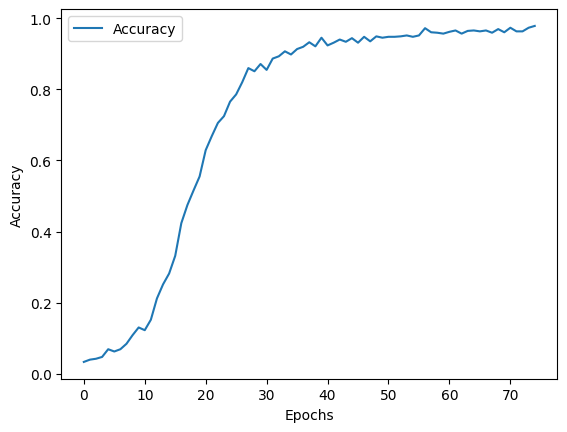

In [18]:
#@title Training accuracy

#Calculating the average accuracy

# Get the accuracy values for each metric
accuracy_dense_1 = hist.history['dense_1_accuracy']
accuracy_dense_3 = hist.history['dense_3_accuracy']
accuracy_dense_5 = hist.history['dense_5_accuracy']
accuracy_dense_7 = hist.history['dense_7_accuracy']

# Calculate the average accuracy for each epoch
average_accuracy = [(a1 + a3 + a5 + a7) / 4 for a1, a3, a5, a7 in zip(accuracy_dense_1, accuracy_dense_3, accuracy_dense_5, accuracy_dense_7)]

# Plot the average accuracy curve
plt.plot(average_accuracy, label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

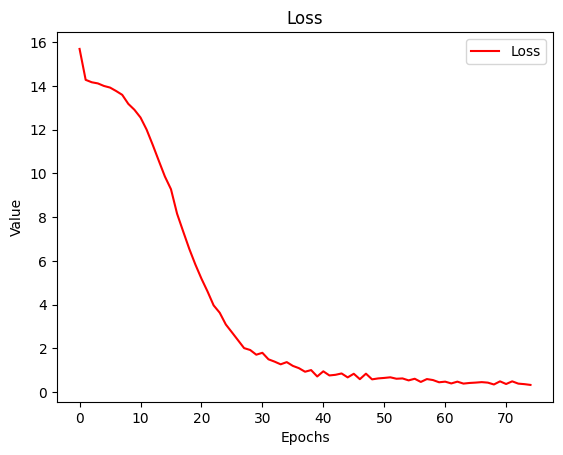

In [19]:
#@title Training Loss
# Plot the average accuracy curve and loss curve on a single plot

plt.plot(hist.history['loss'], label='Loss', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss')
plt.show()


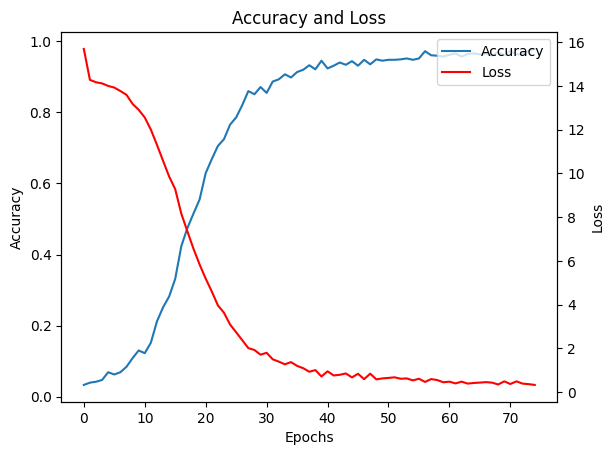

In [20]:
#@title Training loss and accuracy
# Plot the accuracy curve
plt.plot(average_accuracy, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy and Loss')

# Create a twin y-axis for loss
ax = plt.gca()
ax2 = ax.twinx()

# Plot the loss curve
plt.plot(hist.history['loss'], label='Loss', color='red')
plt.ylabel('Loss')

# Add legends for both curves
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2)

plt.show()


In [21]:
print(hist.history.keys())

dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'val_loss', 'val_dense_1_loss', 'val_dense_3_loss', 'val_dense_5_loss', 'val_dense_7_loss', 'val_dense_1_accuracy', 'val_dense_3_accuracy', 'val_dense_5_accuracy', 'val_dense_7_accuracy'])


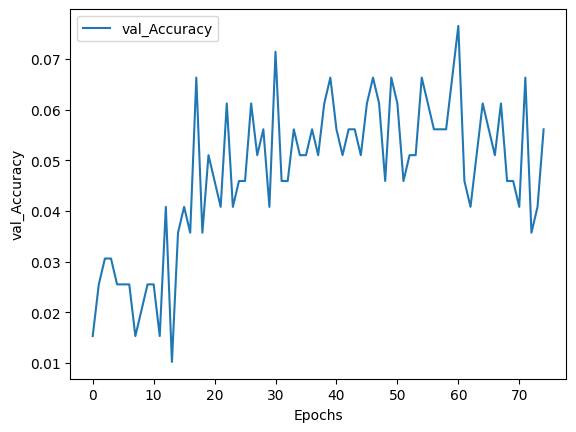

In [22]:
#@title Validation accuracy
#Calculating the average validation accuracy

# Get the accuracy values for each metric
accuracy_val_dense_1 = hist.history['val_dense_1_accuracy']
accuracy_val_dense_3 = hist.history['val_dense_3_accuracy']
accuracy_val_dense_5 = hist.history['val_dense_5_accuracy']
accuracy_val_dense_7 = hist.history['val_dense_7_accuracy']

# Calculate the average accuracy for each epoch
average_val_accuracy = [(v1 + v3 + v5 + v7) / 4 for v1, v3, v5, v7 in zip(accuracy_val_dense_1, accuracy_val_dense_3, accuracy_val_dense_5, accuracy_val_dense_7)]

# Plot the average accuracy curve
plt.plot(average_val_accuracy, label='val_Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('val_Accuracy')
plt.show()

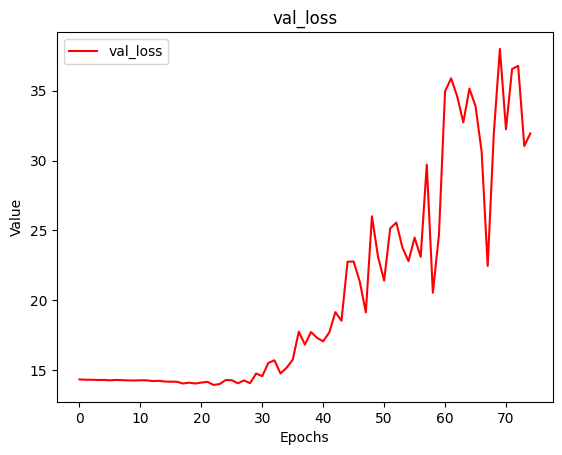

In [23]:
#@title Validation loss
# Plot the average accuracy curve and loss curve on a single plot
plt.plot(hist.history['val_loss'], label='val_loss', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('val_loss')
plt.show()

The validation accuracy and loss curves look like they could improve if the dataset was larger. The validation set was only about 60 datapoints

In [24]:
# Training Loss
preds = model.evaluate(X_train, [y_train[:, 0], y_train[:, 1], y_train[:, 2], y_train[:, 3]])
print("Loss on training set =", preds[0])


8/8 [==============================] - 0s 24ms/step - loss: 6.3883 - dense_1_loss: 1.4863 - dense_3_loss: 1.7182 - dense_5_loss: 1.4681 - dense_7_loss: 1.7157 - dense_1_accuracy: 0.8204 - dense_3_accuracy: 0.8082 - dense_5_accuracy: 0.8041 - dense_7_accuracy: 0.8122
Loss on training set = 6.38826847076416


In [25]:
# Test Data
test_files = os.listdir(test_dir)

X_test = []
y_test = []

for pic in test_files:
    img_path = os.path.join(test_dir, pic)
    pic_target = pic[:-4]  # Remove the file extension correctly

    if len(pic_target) == 4:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = img / 255.0
            img = np.reshape(img, (50, 200, 1))

            target = np.zeros((4, nchar))
            for j, k in enumerate(pic_target):
                index = character.find(k)
                target[j, index] = 1

            X_test.append(img)
            y_test.append(target)
        else:
            print(f"Failed to read image: {img_path}")

X_test = np.array(X_test)
y_test = np.array(y_test)



In [26]:
preds_test = model.evaluate(X_test, [y_test[:, 0], y_test[:, 1], y_test[:, 2], y_test[:, 3]])
print("Loss on test set =", preds_test[0])


2/2 [==============================] - 0s 110ms/step - loss: 38.1426 - dense_1_loss: 13.2658 - dense_3_loss: 9.0789 - dense_5_loss: 7.2842 - dense_7_loss: 8.5138 - dense_1_accuracy: 0.0000e+00 - dense_3_accuracy: 0.0000e+00 - dense_5_accuracy: 0.0806 - dense_7_accuracy: 0.0323
Loss on test set = 38.14262390136719


###Predicting captcha

In [27]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image found at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #x_train 970*50*200*1
    #returns array of size 1*4*36 
    result = np.reshape(res, (4, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

Test Set Size: 62
Test Set Size before evaluation: 62
2/2 [==============================] - 0s 15ms/step - loss: 38.1426 - dense_1_loss: 13.2658 - dense_3_loss: 9.0789 - dense_5_loss: 7.2842 - dense_7_loss: 8.5138 - dense_1_accuracy: 0.0000e+00 - dense_3_accuracy: 0.0000e+00 - dense_5_accuracy: 0.0806 - dense_7_accuracy: 0.0323
Loss on test set: [38.14262390136719, 13.265814781188965, 9.078853607177734, 7.284174919128418, 8.51378059387207, 0.0, 0.0, 0.08064515888690948, 0.032258063554763794]
Test Set Size after evaluation: 62


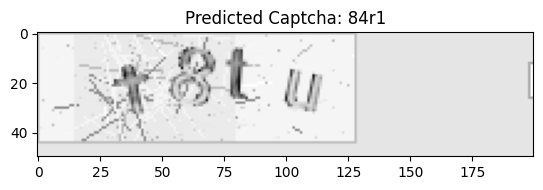

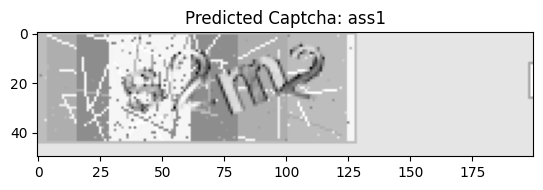

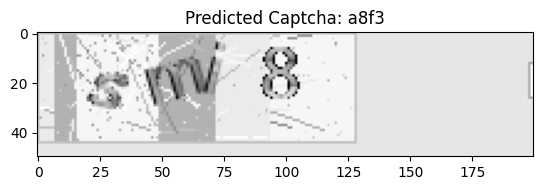

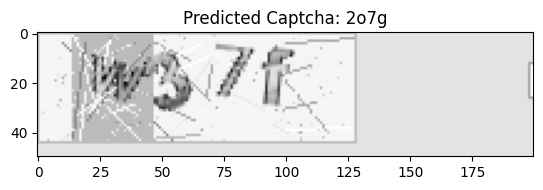

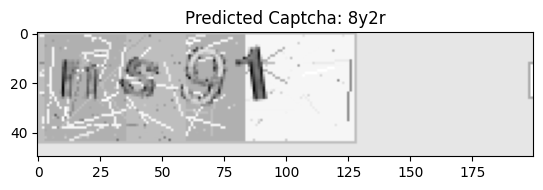

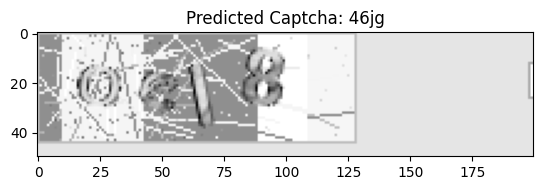

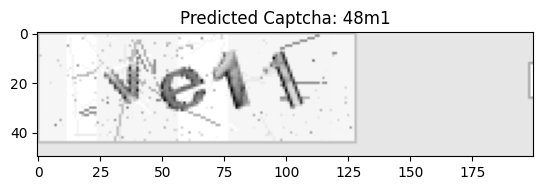

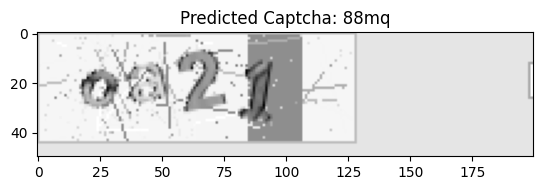

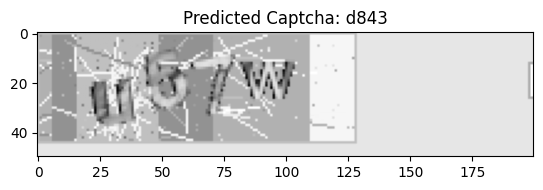

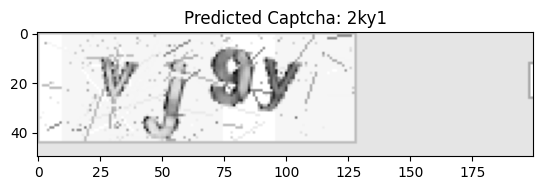

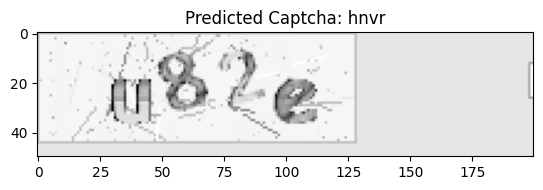

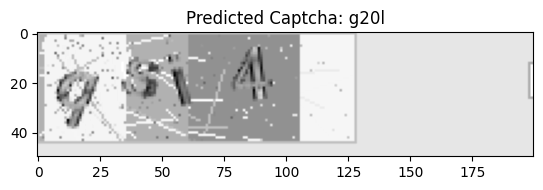

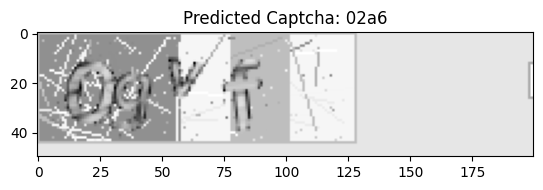

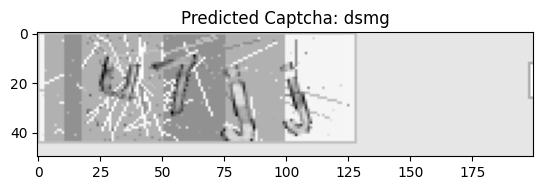

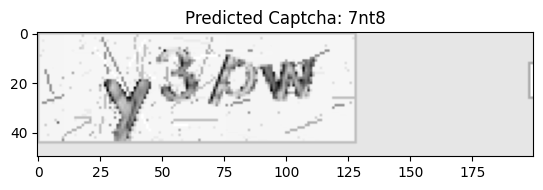

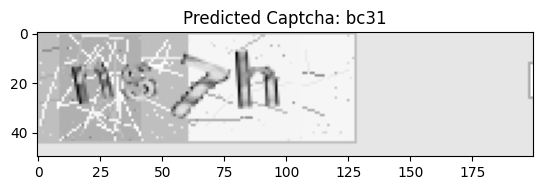

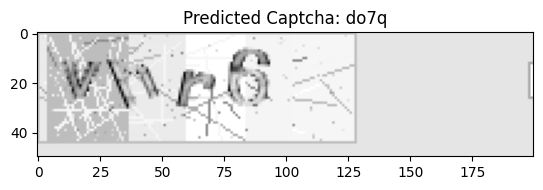

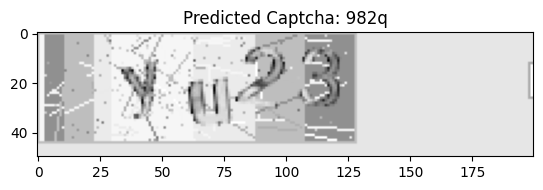

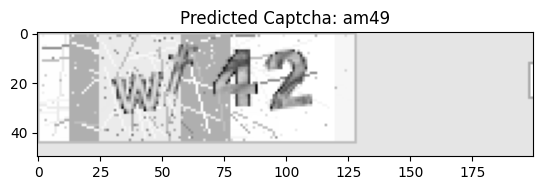

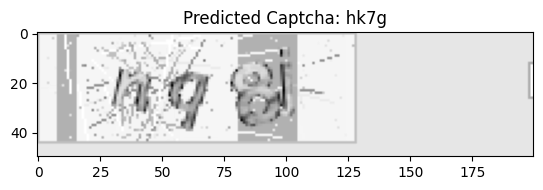

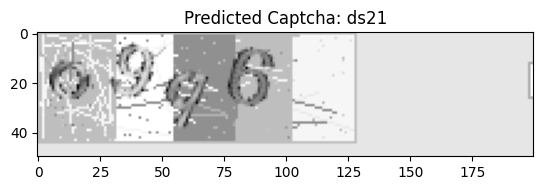

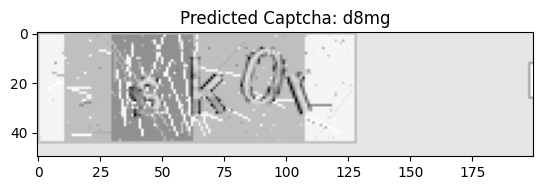

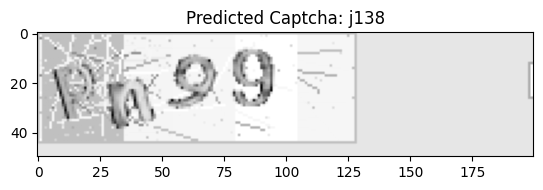

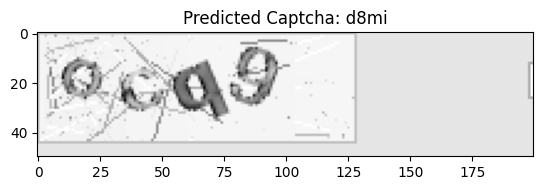

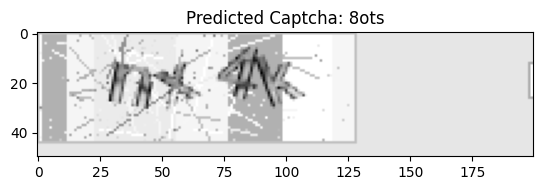

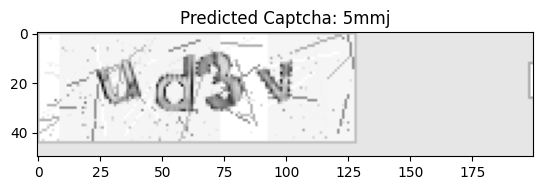

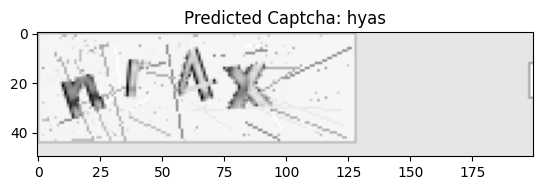

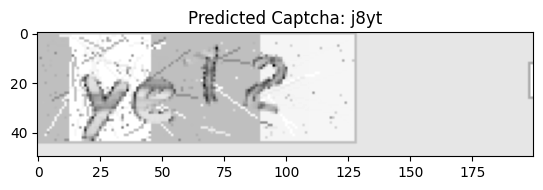

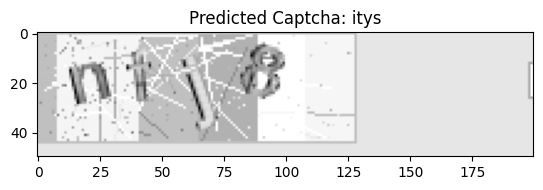

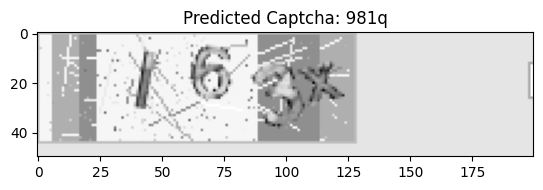

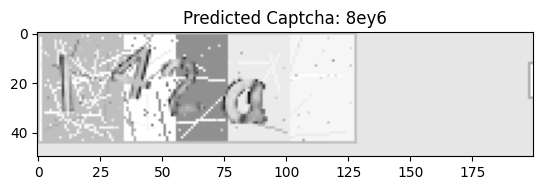

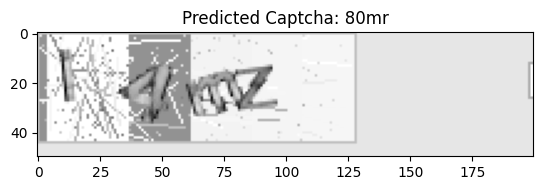

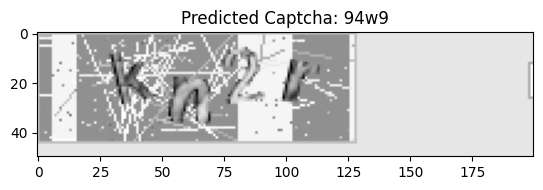

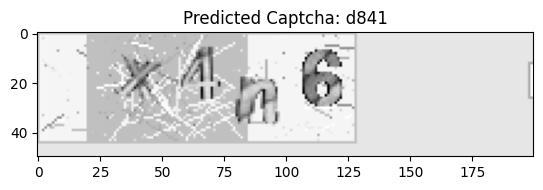

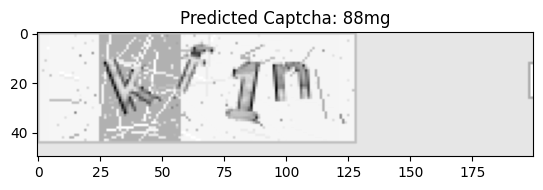

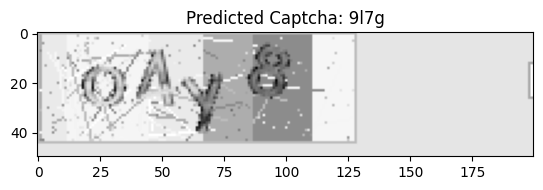

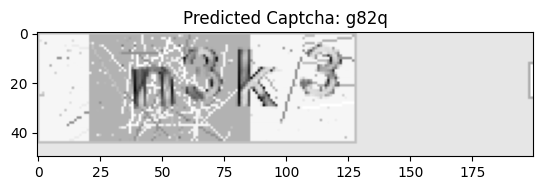

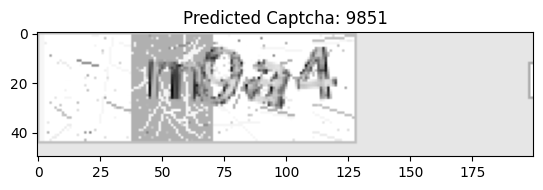

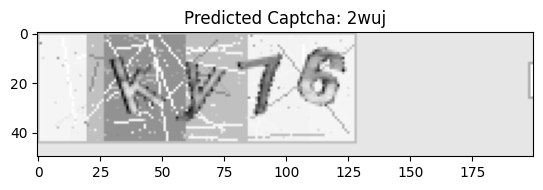

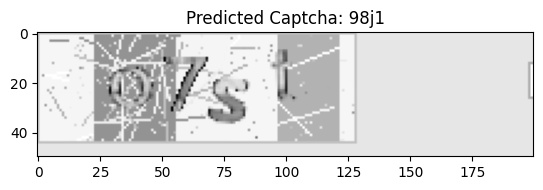

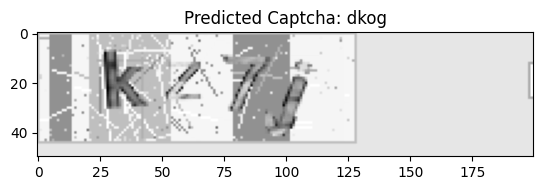

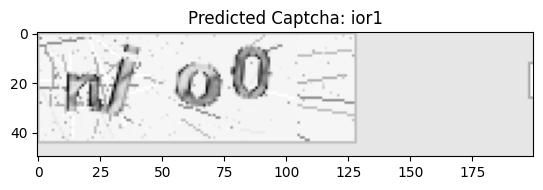

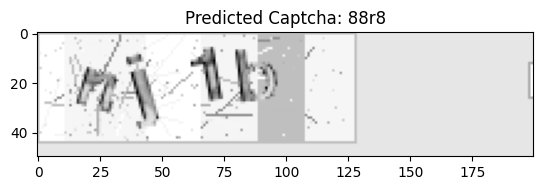

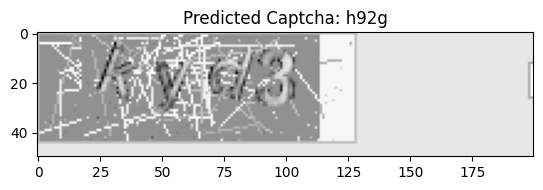

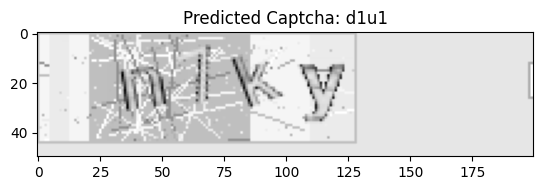

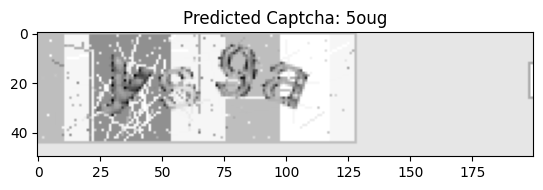

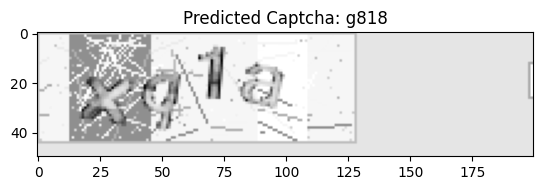

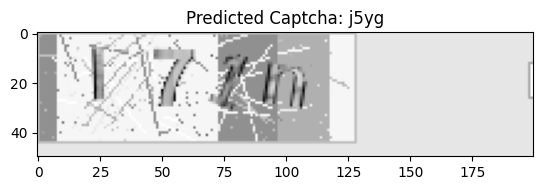

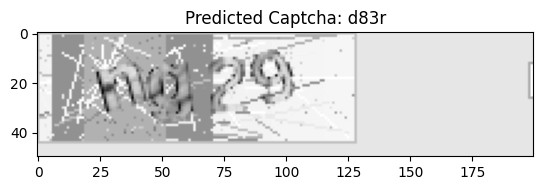

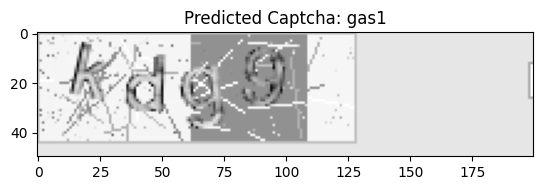

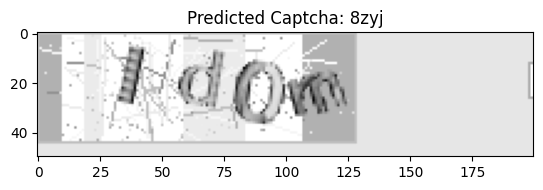

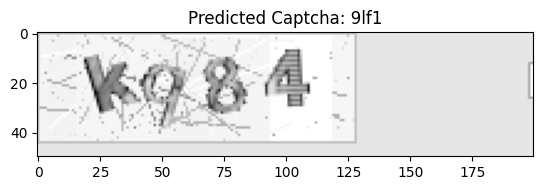

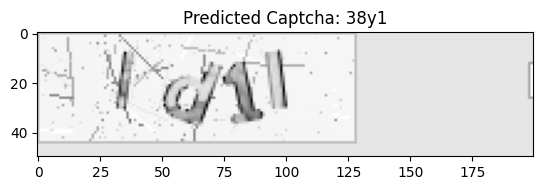

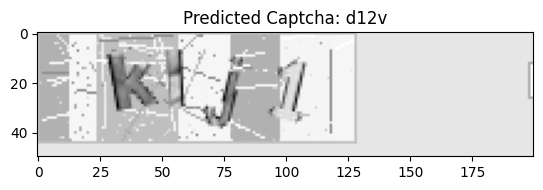

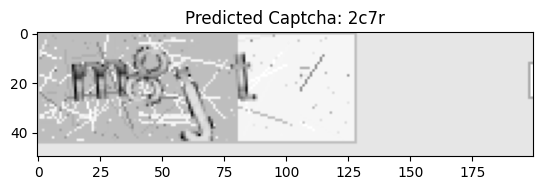

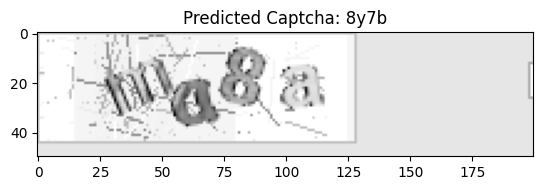

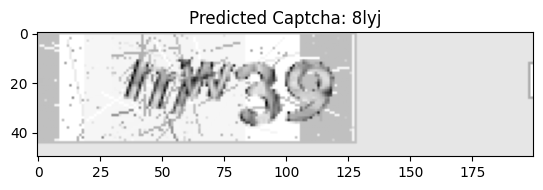

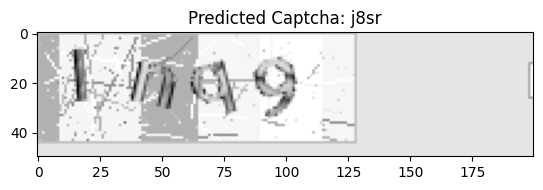

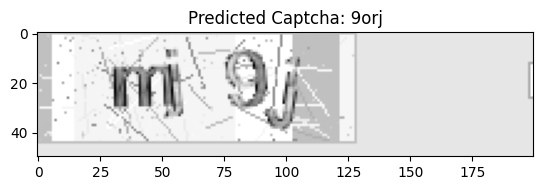

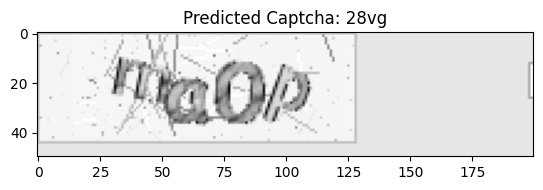

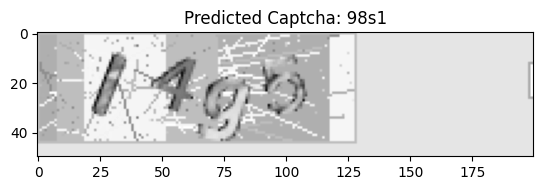

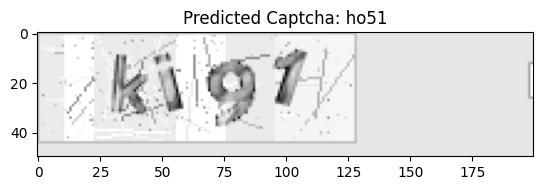

Correctly predicted characters: 7
Total characters: 248


In [28]:
# Test Data
test_set_size = len(X_test)
print("Test Set Size:", test_set_size)

# Preprocess the test data
X_test = np.zeros((test_set_size, 50, 200, 1))
y_test = np.zeros((4, test_set_size, nchar))

test_index = 0
correct_characters = 0  # Counter for correctly predicted characters

for i, pic in enumerate(os.listdir(test_dir)):
    img = cv2.imread(os.path.join(test_dir, pic), cv2.IMREAD_GRAYSCALE)
    pic_target = pic[:-4]

    if len(pic_target) < 5:
        img = img / 255.0
        img = np.reshape(img, (50, 200, 1))

        target = np.zeros((4, nchar))
        for j, k in enumerate(pic_target):
            index = character.find(k)
            target[j, index] = 1

        if test_index >= test_set_size:
            break

        X_test[test_index] = img
        y_test[:, test_index] = target
        test_index += 1

# Only consider the relevant part of y_test based on the number of test samples
y_test = y_test[:, :test_index]

print("Test Set Size before evaluation:", len(X_test))

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert the predicted outputs into captcha strings
predicted_captchas = []
for i in range(X_test.shape[0]):
    captcha = ''
    for j in range(4):
        captcha += character[np.argmax(predictions[j][i])]
    predicted_captchas.append(captcha)

# Evaluate the performance of the model on the test data
test_loss = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3]])
print("Loss on test set:", test_loss)

print("Test Set Size after evaluation:", len(X_test))

# Print the predicted captchas and count correctly predicted characters
correct_characters = 0

for i in range(len(X_test)):
    img = X_test[i].squeeze()
    plt.imshow(img, cmap='gray')
    plt.title("Predicted Captcha: " + predicted_captchas[i])
    plt.show()

    # Compare predicted captcha with ground truth captcha
    ground_truth_captcha = ''.join([character[np.argmax(y_test[j][i])] for j in range(4)])
    predicted_captcha = predicted_captchas[i]

    for j in range(4):
        if predicted_captcha[j] == ground_truth_captcha[j]:
            correct_characters += 1

# Print the number of correctly predicted characters out of the total characters
print("Correctly predicted characters:", correct_characters)
print("Total characters:", len(X_test) * 4)
